In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist # 28 x 28 images of handwrittwn images from 0 to 9

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

2023-10-15 20:39:09.117115: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-15 20:39:19.786762: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/3
1875/1875 [==============================] - 2s 728us/step - loss: 0.2623 - accuracy: 0.9229
Epoch 2/3
1875/1875 [==============================] - 1s 690us/step - loss: 0.1043 - accuracy: 0.9676
Epoch 3/3
1875/1875 [==============================] - 1s 691us/step - loss: 0.0699 - accuracy: 0.9778


In [2]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 465us/step - loss: 0.0988 - accuracy: 0.9690
0.09878721833229065 0.968999981880188


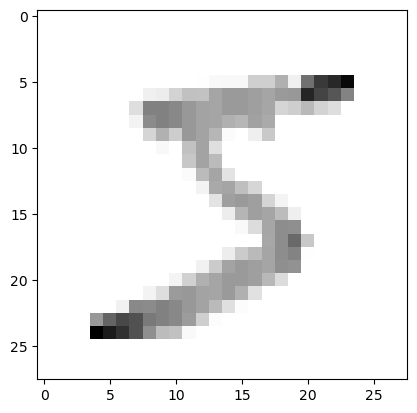

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [3]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()
print(x_train[0])

In [4]:
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [5]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [6]:
predictions = new_model.predict([x_test])

313/313 [==============================] - 0s 433us/step


In [7]:
print(predictions)

[[5.03792350e-08 3.27271650e-08 2.31502509e-06 ... 9.99991775e-01
  3.66518993e-09 8.05443790e-07]
 [6.37326139e-08 1.38445979e-03 9.98593152e-01 ... 5.95356880e-07
  7.77107800e-08 2.21415619e-09]
 [6.26026917e-07 9.99912381e-01 2.21973660e-05 ... 2.42035094e-05
  6.62926413e-06 1.41373641e-06]
 ...
 [1.28701023e-08 2.94293795e-06 1.35487895e-07 ... 1.73847773e-04
  4.03836930e-05 1.26986371e-04]
 [1.21445155e-05 1.65358142e-05 3.85667272e-06 ... 4.08722808e-05
  2.94591263e-02 1.66974587e-06]
 [9.66681569e-07 1.95222438e-09 2.45974690e-08 ... 2.76819873e-10
  2.64375615e-07 1.36234968e-09]]


In [21]:
import numpy as np

print(np.argmax(predictions[20]))

9


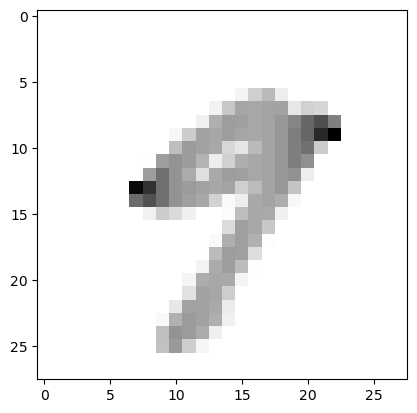

In [20]:
plt.imshow(x_test[20], cmap = plt.cm.binary)
plt.show()